<a href="https://colab.research.google.com/github/eshreyareddy/Dimensionality-reduction-techniques/blob/main/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UMAP**

In [1]:
!pip install umap-learn

import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=7e0e201423cd83c7b3bc520bc6b19a2ddfe5e18c6387604e8c06b83f83051463
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [2]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target.astype(np.int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-2-b3a583582dee>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = mnist.targe

In [3]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


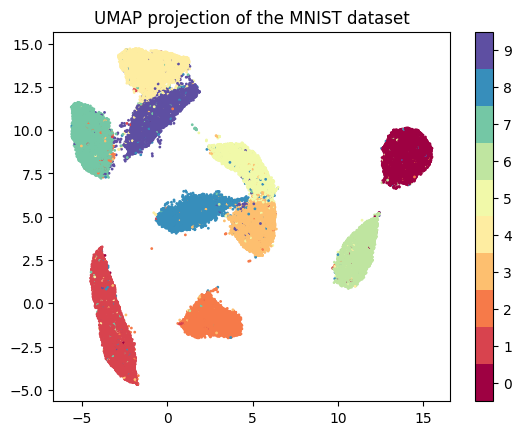

In [4]:
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap='Spectral', s=1)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the MNIST dataset')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


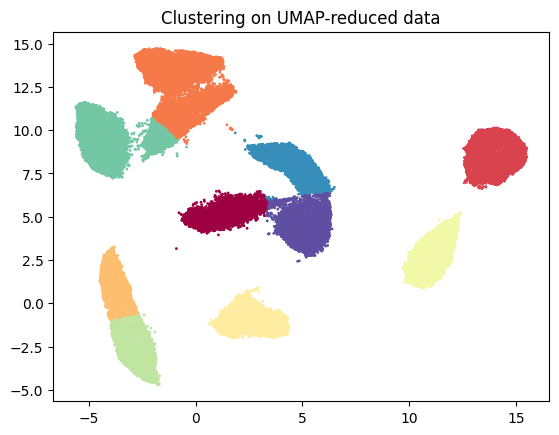

In [5]:
kmeans = KMeans(n_clusters=10, random_state=42)
y_pred = kmeans.fit_predict(X_train_umap)

# Visualize the clustering
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_pred, cmap='Spectral', s=1)
plt.title('Clustering on UMAP-reduced data')
plt.show()


In [6]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_umap, y_train)

# Transform the test data
X_test_umap = umap_model.transform(X_test)

# Predict on test data
y_pred_test = rf_classifier.predict(X_test_umap)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.95


In [8]:
!pip install umap-learn

import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


In [9]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target.astype(np.int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-9-b3a583582dee>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = mnist.targe

In [10]:
umap_model = umap.UMAP(n_components=50, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [11]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_umap, y_train)


RandomForestClassifier(random_state=42)

In [12]:
X_test_umap = umap_model.transform(X_test)
y_pred = classifier.predict(X_test_umap)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9557857142857142
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1343
           1       0.93      0.99      0.96      1600
           2       0.97      0.94      0.96      1380
           3       0.96      0.94      0.95      1433
           4       0.97      0.95      0.96      1295
           5       0.96      0.95      0.95      1273
           6       0.97      0.98      0.97      1396
           7       0.95      0.96      0.95      1503
           8       0.97      0.91      0.94      1357
           9       0.92      0.95      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



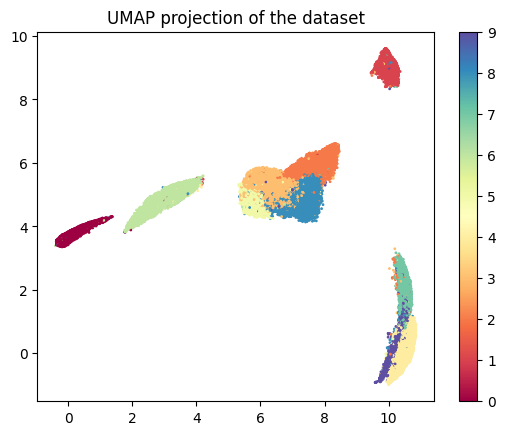

In [13]:
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap='Spectral', s=1)
plt.title('UMAP projection of the dataset')
plt.colorbar()
plt.show()
